In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("performance.csv")
df.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,Performance_Index,Previous_Performance_Scores,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,69,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,91,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,79,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,58,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [50]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on 'Nationality'
label_encoder = LabelEncoder()
df['Nationality_Encoded'] = label_encoder.fit_transform(df['Nationality'])

# Display the updated DataFrame with 'Nationality_Encoded'
print(df.head())


  gender Nationality PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  Performance_Index  \
0        F   Father           15                 16   
1        F   Father           20                 20   
2        F   Father           10                 79   
3        F   Father           30                 25   
4        F   Father           40                 50   

   Previous_Performance_Scores  Discussion ParentAnsweringSurvey  \
0                           69          20                   Yes   
1                           91          25                   Yes   
2                         

In [51]:
#selecting only the data frames we will use
df = df[["gender", "Nationality","Performance_Index","Previous_Performance_Scores","StudentAbsenceDays", ]]
df.head()

,gender,Nationality,Performance_Index,Previous_Performance_Scores,StudentAbsenceDays
0,M,KW,16,69,Under-7
1,M,KW,20,91,Under-7
2,M,KW,79,0,Above-7
3,M,KW,25,58,Above-7
4,M,KW,50,12,Above-7


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       480 non-null    object
 1   Nationality                  480 non-null    object
 2   Performance_Index            480 non-null    int64 
 3   Previous_Performance_Scores  480 non-null    int64 
 4   StudentAbsenceDays           480 non-null    object
dtypes: int64(2), object(3)
memory usage: 18.9+ KB


In [53]:
df['Nationality'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

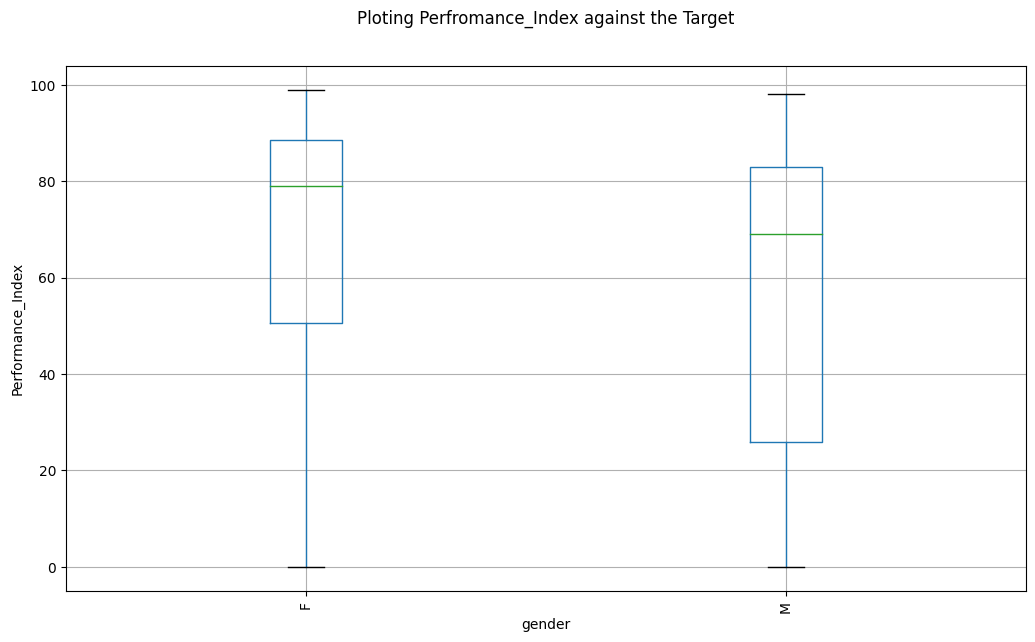

In [54]:
# ploting performance_index against gender

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Performance_Index', 'gender', ax=ax)
plt.suptitle('Ploting Perfromance_Index against the Target')
plt.title('')
plt.ylabel('Performance_Index')
plt.xticks(rotation=90)
plt.show()

In [55]:
df = df[df["Performance_Index"]<= 90]
df = df[df["Performance_Index"]>= 70]
df = df[df["gender"] != 'other']

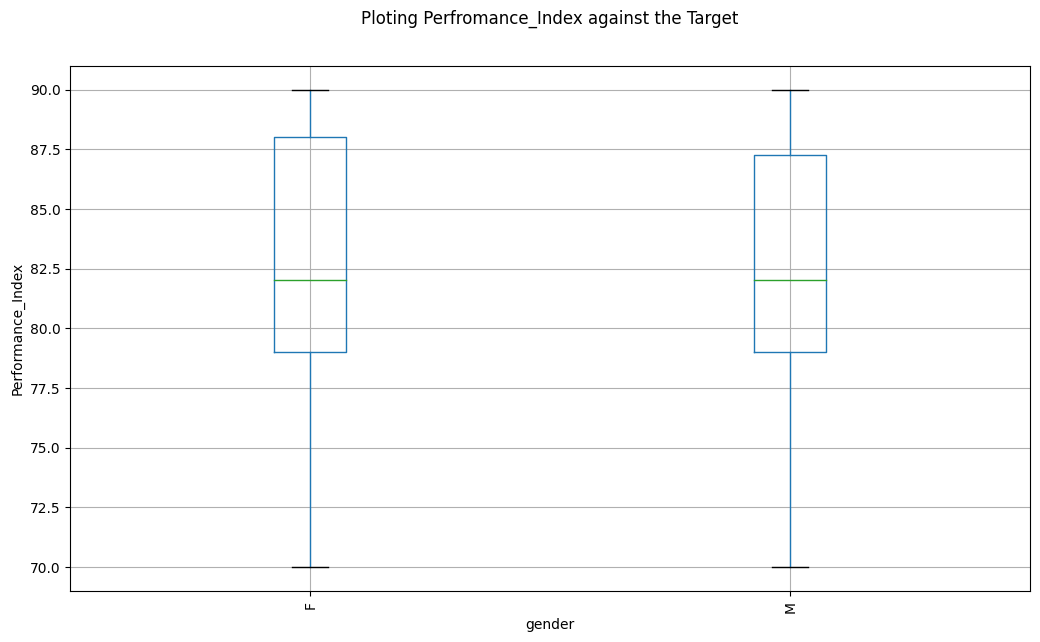

In [56]:
# ploting performance_index against gender

fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Performance_Index', 'gender', ax=ax)
plt.suptitle('Ploting Perfromance_Index against the Target')
plt.title('')
plt.ylabel('Performance_Index')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - you can choose different strategies based on the context
# For example, you can fill missing values with the mean, median, or most frequent value of the respective column.

# Encoding categorical features (if any) using one-hot encoding or label encoding
# For example, convert "gender" and "StudentAbsenceDays" to numerical values using label encoding.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])
df["StudentAbsenceDays"] = label_encoder.fit_transform(df["StudentAbsenceDays"])
df["Nationality"] = label_encoder.fit_transform(df["Nationality"])

# Split the data into features (X) and target (y)
X = df.drop("Performance_Index", axis=1)  # Features
y = df["Performance_Index"]  # Target

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gender                         0
Nationality                    0
Performance_Index              0
Previous_Performance_Scores    0
StudentAbsenceDays             0
dtype: int64


In [58]:
# Choose a machine learning model - For this example, let's use a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score
# from sklearn.metrics import accuracy_score, classification_report

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print("Model Accuracy:", accuracy)
# print("Classification Report:\n", report)


# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model's performance on the training set
from sklearn.metrics import accuracy_score, classification_report

train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)



Training Accuracy: 0.9006211180124224
Training Classification Report:
               precision    recall  f1-score   support

          70       0.92      1.00      0.96        11
          71       1.00      0.67      0.80         3
          72       0.67      1.00      0.80         2
          74       1.00      0.50      0.67         2
          75       0.88      1.00      0.93         7
          76       1.00      1.00      1.00         3
          77       1.00      0.75      0.86         4
          79       0.83      1.00      0.91        10
          80       0.96      1.00      0.98        26
          81       0.86      1.00      0.92         6
          82       1.00      0.92      0.96        12
          83       0.75      0.75      0.75         4
          84       1.00      0.71      0.83         7
          85       0.86      0.75      0.80         8
          86       0.67      0.80      0.73         5
          87       0.85      1.00      0.92        11
          

In [60]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importances
print(feature_importance_df)


                       Feature  Importance
2  Previous_Performance_Scores    0.704338
1                  Nationality    0.175416
0                       gender    0.066343
3           StudentAbsenceDays    0.053904


In [61]:
# # Save the label encoder classes_
# label_encoder_filename = "nationality_label_encoder.pkl"
# joblib.dump(label_encoder.classes_, label_encoder_filename)

In [62]:
# You can use the joblib library to save the trained model
import joblib

# Save the model to a file
model_filename = "student_performance_model.pkl"
joblib.dump(model, model_filename)


['student_performance_model.pkl']